## Tweet Emotion Recognition: Natural Language Processing with TensorFlow

---

Dataset: [Tweet Emotion Dataset](https://github.com/dair-ai/emotion_dataset)

This is a starter notebook for the guided project [Tweet Emotion Recognition with TensorFlow](https://www.coursera.org/projects/tweet-emotion-tensorflow)

A complete version of this notebook is available in the course resources

---

## Task 1: Introduction

## Task 2: Setup and Imports

1. Installing Hugging Face's nlp package
2. Importing libraries

In [ ]:
!pip install nlp

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 87.7 MB/s eta 0:00:00


This Python script is designed for building and evaluating machine learning models for natural language processing tasks, such as emotion recognition in text. It uses TensorFlow for model training and NumPy for numerical operations, while Matplotlib is employed for visualizing training performance and evaluation metrics. The show_history function plots the model’s training and validation accuracy and loss across epochs, providing insights into how well the model learns and whether it is overfitting or underfitting. The show_confusion_matrix function visualizes the normalized confusion matrix for predicted versus true labels, allowing a clear assessment of model performance across different classes. Additionally, the script imports an NLP module for text processing and sets up %matplotlib inline to display plots directly in Jupyter notebooks, making it convenient for interactive experimentation. At the end, it prints the TensorFlow version being used, ensuring compatibility awareness.

In [ ]:
%matplotlib inline

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import nlp
import random


def show_history(h):
    epochs_trained = len(h.history['loss'])
    plt.figure(figsize=(16, 6))

    plt.subplot(1, 2, 1)
    plt.plot(range(0, epochs_trained), h.history.get('accuracy'), label='Training')
    plt.plot(range(0, epochs_trained), h.history.get('val_accuracy'), label='Validation')
    plt.ylim([0., 1.])
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(range(0, epochs_trained), h.history.get('loss'), label='Training')
    plt.plot(range(0, epochs_trained), h.history.get('val_loss'), label='Validation')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()


def show_confusion_matrix(y_true, y_pred, classes):
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y_true, y_pred, normalize='true')

    plt.figure(figsize=(8, 8))
    sp = plt.subplot(1, 1, 1)
    ctx = sp.matshow(cm)
    plt.xticks(list(range(0, 6)), labels=classes)
    plt.yticks(list(range(0, 6)), labels=classes)
    plt.colorbar(ctx)
    plt.show()


print('Using TensorFlow version', tf.__version__)

Using TensorFlow version 2.19.0


## Task 3: Importing Data

1. Importing the Tweet Emotion dataset
2. Creating train, validation and test sets
3. Extracting tweets and labels from the examples

In [ ]:
import datasets

dataset = datasets.load_dataset('mteb/emotion')

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md: 0.00B [00:00, ?B/s]

data/train-00000-of-00001.parquet:   0%|          | 0.00/1.03M [00:00<?, ?B/s]

data/validation-00000-of-00001.parquet:   0%|          | 0.00/128k [00:00<?, ?B/s]

data/test-00000-of-00001.parquet:   0%|          | 0.00/129k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/15956 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/1988 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/1986 [00:00<?, ? examples/s]

The mteb/emotion dataset loaded from Hugging Face is organized as a DatasetDict containing three splits: train, validation, and test. Each split is a Dataset object with 15956 training samples, 1988 validation samples, and 1986 test samples. Every sample includes three features: text (the raw input text, such as a tweet), label (the numerical class representing the emotion), and label_text (the human-readable emotion label). This structured dataset allows for efficient training, evaluation, and testing of machine learning models for emotion recognition, ensuring that model performance can be validated on unseen data before deployment.

In [ ]:
dataset

DatasetDict({
    train: Dataset({
        features: ['text', 'label', 'label_text'],
        num_rows: 15956
    })
    validation: Dataset({
        features: ['text', 'label', 'label_text'],
        num_rows: 1988
    })
    test: Dataset({
        features: ['text', 'label', 'label_text'],
        num_rows: 1986
    })
})

This code splits the mteb/emotion dataset into three separate subsets: train, validation, and test, making it easier to use in model training and evaluation. By assigning dataset['train'] to train, dataset['validation'] to val, and dataset['test'] to test, you can directly access each subset’s features and samples. The final line prints the shapes of these subsets, providing a quick overview of the number of samples and confirming that the data has been correctly divided for training (15,956 samples), validation (1,988 samples), and testing (1,986 samples). This step ensures proper preparation for training a model while maintaining separate datasets for unbiased evaluation.

In [ ]:
train, val, test = dataset['train'], dataset['validation'], dataset['test']

f"{train.shape}, {val.shape}, {test.shape}"

'(15956, 3), (1988, 3), (1986, 3)'

The get_tweet function is designed to extract the text and corresponding emotion labels from a dataset split. It takes a dataset subset (train, validation, or test) as input and iterates through each sample, collecting the text field (the tweet or sentence) into a list called tweets, and the label_text field (the human-readable emotion label) into a list called labels. The function then returns these two lists, making it easy to feed the text and labels into preprocessing pipelines, tokenizers, or machine learning models for training and evaluation in emotion recognition tasks.

In [ ]:
def get_tweet(data):
    tweets = [x['text'] for x in data]
    labels = [x['label_text'] for x in data]
    return tweets, labels

This line uses the previously defined get_tweet function to extract the text data and emotion labels from the training subset of the dataset. By calling get_tweet(train), it creates two lists: tweets, which contains all the raw tweet texts, and labels, which contains their corresponding human-readable emotion labels. These lists can then be used for preprocessing, tokenization, and feeding into a machine learning or deep learning model for training the emotion recognition system.

In [ ]:
tweets, labels = get_tweet(train)

In [ ]:
tweets[0:2], labels[0:2]

(['i didnt feel humiliated',
  'i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake'],
 ['sadness', 'sadness'])

## Task 4: Tokenizer

1. Tokenizing the tweets

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer

This code initializes a text tokenizer for preprocessing the tweet data before feeding it into a neural network. The Tokenizer is set to consider the 10,000 most frequent words (num_words=10_000) and assigns the special token <UNK> to any out-of-vocabulary words. The fit_on_texts(tweets) method scans all training tweets to build a word-to-index mapping based on word frequency, allowing each tweet to be converted into sequences of numerical indices that the model can process. This step is essential for transforming raw text into a format suitable for TensorFlow or other deep learning models.

In [ ]:
tokenizer = Tokenizer(num_words=10_000, oov_token='<UNK>')
tokenizer.fit_on_texts(tweets)

## Task 5: Padding and Truncating Sequences

1. Checking length of the tweets
2. Creating padded sequences

This code analyzes and visualizes the distribution of tweet lengths in the training dataset. First, it calculates the number of words in each tweet by splitting the text on spaces and storing the lengths in the lengths list. Then, it creates a histogram using Matplotlib, where the x-axis represents the number of words in a tweet and the y-axis shows the frequency of tweets of that length. This visualization helps to understand the typical tweet length, identify outliers, and make decisions about padding or truncating sequences during preprocessing for model training.

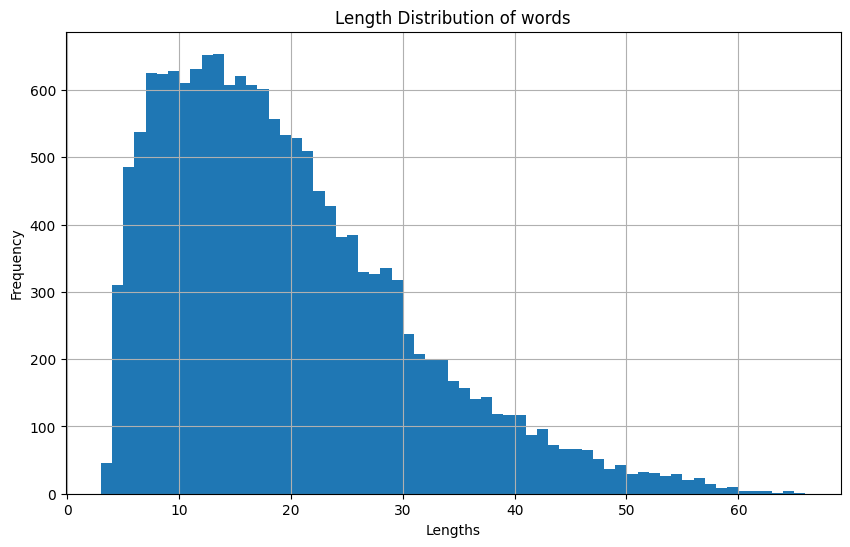

In [ ]:
lengths = [len(t.split(' ')) for t in tweets]

plt.figure(figsize=(10, 6))
plt.hist(lengths, bins=len(set(lengths)))
plt.title("Length Distribution of words")
plt.xlabel("Lengths")
plt.ylabel("Frequency")
plt.grid()
plt.show()

This code converts the tokenized tweets into fixed-length sequences suitable for input to a neural network. First, the get_sequences function uses the tokenizer to transform each tweet into a sequence of integer indices corresponding to words. Then, pad_sequences ensures all sequences are of length max_len = 50 by truncating longer tweets and padding shorter ones at the end (truncating='post', padding='post'). This standardization allows the model to process batches of input data efficiently, and padded_train_seq stores the resulting padded sequences for the training set.

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

max_len = 50


def get_sequences(tokenizer, tweets):
    sequences = tokenizer.texts_to_sequences(tweets)
    padded_sequences = pad_sequences(sequences, maxlen=max_len, truncating='post', padding='post')
    return padded_sequences


padded_train_seq = get_sequences(tokenizer, tweets)

This line accesses the first padded sequence from the training data, padded_train_seq[0]. It shows how the first tweet has been converted into a fixed-length sequence of integers, where each integer represents a word from the tokenizer’s vocabulary, and padding (zeros) is added at the end if the tweet is shorter than the specified max_len of 50. Inspecting this sequence helps verify that tokenization and padding were applied correctly before feeding the data into a neural network for training.

In [ ]:
padded_train_seq[0]

array([  2, 139,   3, 678,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0], dtype=int32)

This code visualizes the distribution of tweet lengths after tokenization and padding. It calculates the length of each sequence in padded_train_seq (which should all be equal to max_len = 50) and stores them in the lengths list. Then, it plots a histogram using Matplotlib. This plot is mainly a sanity check, confirming that all sequences have been standardized to the same length, ensuring the model receives consistent input shapes during training. The title emphasizes that the lengths are now uniform post-tokenization and padding.

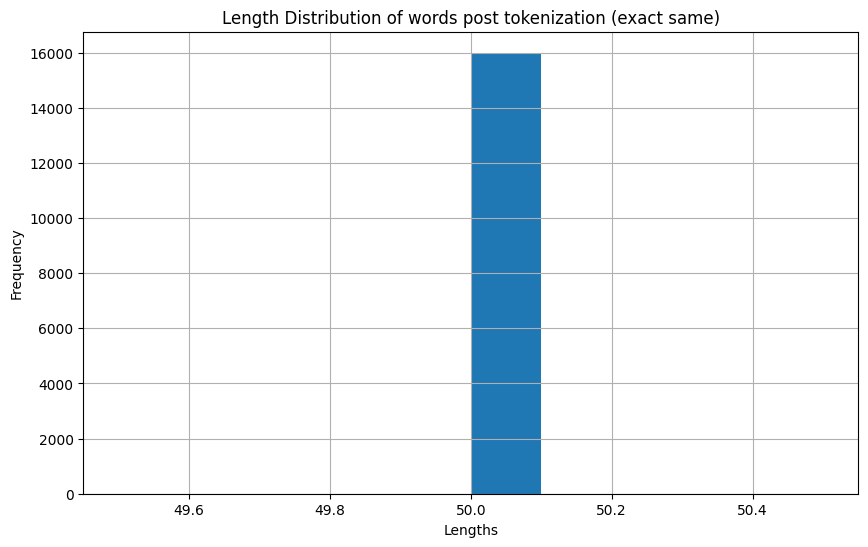

In [ ]:
lengths = [len(t) for t in padded_train_seq]

plt.figure(figsize=(10, 6))
plt.hist(lengths)
plt.title("Length Distribution of words post tokenization (exact same)")
plt.xlabel("Lengths")
plt.ylabel("Frequency")
plt.grid()
plt.show()

## Task 6: Preparing the Labels

1. Creating classes to index and index to classes dictionaries
2. Converting text labels to numeric labels

In [ ]:
classes = np.unique(labels)
classes

array(['anger', 'fear', 'joy', 'love', 'sadness', 'surprise'], dtype='<U8')

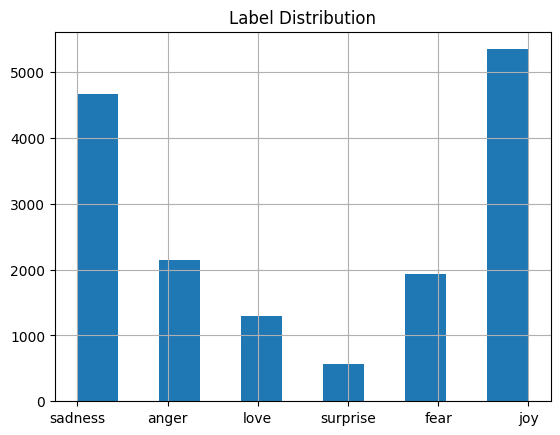

In [ ]:
plt.hist(labels, bins=11)
plt.title("Label Distribution")
plt.grid()
plt.show()

This code handles class imbalance in the emotion labels, which is common in real-world datasets where some emotions appear more frequently than others. Using compute_class_weight from sklearn, it calculates a weight for each class inversely proportional to its frequency in the training data. These weights are stored in a dictionary class_weights mapping each emotion label to its corresponding weight. Applying these class weights during model training ensures that the model pays more attention to underrepresented classes, improving overall performance and preventing bias toward dominant emotions.

In [ ]:
# handling imbalance of classes
from sklearn.utils.class_weight import compute_class_weight

weights = compute_class_weight(class_weight='balanced', y=labels, classes=np.unique(labels))
class_weights = dict(zip(np.unique(labels), weights))
class_weights

{np.str_('anger'): np.float64(1.2357496902106568),
 np.str_('fear'): np.float64(1.3771793543932331),
 np.str_('joy'): np.float64(0.4975366386030558),
 np.str_('love'): np.float64(2.050372654844513),
 np.str_('sadness'): np.float64(0.570305239831296),
 np.str_('surprise'): np.float64(4.681924882629108)}

This code creates a mapping from emotion labels to numerical indices using a dictionary called class_to_index. By enumerating over the list of classes, each emotion label (e.g., “joy”, “sadness”) is assigned a unique integer index. This mapping is essential for converting human-readable labels into numeric form, which neural networks require for training and evaluation, especially when using categorical loss functions like sparse_categorical_crossentropy.

In [ ]:
class_to_index = dict([(c, i) for i, c in enumerate(classes)])
class_to_index

{np.str_('anger'): 0,
 np.str_('fear'): 1,
 np.str_('joy'): 2,
 np.str_('love'): 3,
 np.str_('sadness'): 4,
 np.str_('surprise'): 5}

This code creates a reverse mapping from numerical indices back to emotion labels using a dictionary called index_to_class. By swapping the keys and values from class_to_index, each integer index is associated with its corresponding human-readable emotion (e.g., 0 → joy, 1 → sadness). This mapping is useful during model evaluation or prediction, allowing you to convert the model’s numeric outputs back into meaningful emotion labels for interpretation or visualization.

In [ ]:
index_to_class = dict([(v, k) for k, v in class_to_index.items()])
index_to_class

{0: np.str_('anger'),
 1: np.str_('fear'),
 2: np.str_('joy'),
 3: np.str_('love'),
 4: np.str_('sadness'),
 5: np.str_('surprise')}

This code converts the class weights dictionary from using label names to using numerical indices, creating class_weights_ints. By mapping each class label in class_weights to its corresponding integer index from class_to_index, the dictionary now aligns with the model’s expected numeric targets. This allows the class weights to be directly applied during neural network training, ensuring that underrepresented emotion classes are properly emphasized while using integer-based label encoding.

In [ ]:
class_weights_ints = dict([
    (class_to_index[c], w) for c, w in class_weights.items()
])
class_weights_ints

{0: np.float64(1.2357496902106568),
 1: np.float64(1.3771793543932331),
 2: np.float64(0.4975366386030558),
 3: np.float64(2.050372654844513),
 4: np.float64(0.570305239831296),
 5: np.float64(4.681924882629108)}

## Task 7: Creating the Model

1. Creating the model
2. Compiling the model

This code defines and compiles a deep learning model for tweet emotion recognition using TensorFlow and Keras. The model is a Sequential neural network structured as follows:


1.   Input Layer – Accepts sequences of fixed length max_len (50), representing tokenized and padded tweets.
2.   Embedding Layer – Maps the 10,000 most frequent words into 24-dimensional dense vectors, allowing the model to learn meaningful word representations.
3. Bidirectional LSTM Layers – Two stacked Bidirectional LSTMs (with 20 units each) process the sequences in both forward and backward directions, capturing contextual dependencies in the text. The first LSTM returns sequences for the next layer, while the second outputs a final representation for classification.
4. Dense Output Layer – A fully connected layer with 6 units (one per emotion class) and a softmax activation to produce class probabilities.



In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((max_len,), name='input_layer'),
    tf.keras.layers.Embedding(10_000, 24, name='embedding_layer'),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(20, return_sequences=True), name='bidirectional_lstm_layer_1'),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(20), name='bidirectional_lstm_layer_2'),  # RNN part of the model
    tf.keras.layers.Dense(6, activation='softmax', name='output')
])
model.compile(
    loss=tf.keras.losses.CategoricalCrossentropy(),
    optimizer='adam',
    metrics=[tf.keras.metrics.F1Score(name='f1_score', average='macro')]
)
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_layer (Embedding)     │ (None, 50, 24)         │       240,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_lstm_layer_1      │ (None, 50, 40)         │         7,200 │
│ (Bidirectional)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_lstm_layer_2      │ (None, 40)             │         9,760 │
│ (Bidirectional)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 6)              │           246 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 257,206 (1004.71 KB)

 Trainable params: 257,206 (1004.71 KB)

 Non-trainable params: 0 (0.00 B)

This line uses TensorFlow Keras’s plot_model utility to create a visual diagram of the neural network architecture. The diagram is displayed left-to-right (rankdir='LR') and includes the input and output shapes of each layer (show_shapes=True) as well as the activation functions used in every layer (show_layer_activations=True). This visualization helps in understanding the model’s structure, verifying the flow of data through layers, and communicating the architecture clearly in reports or presentations.

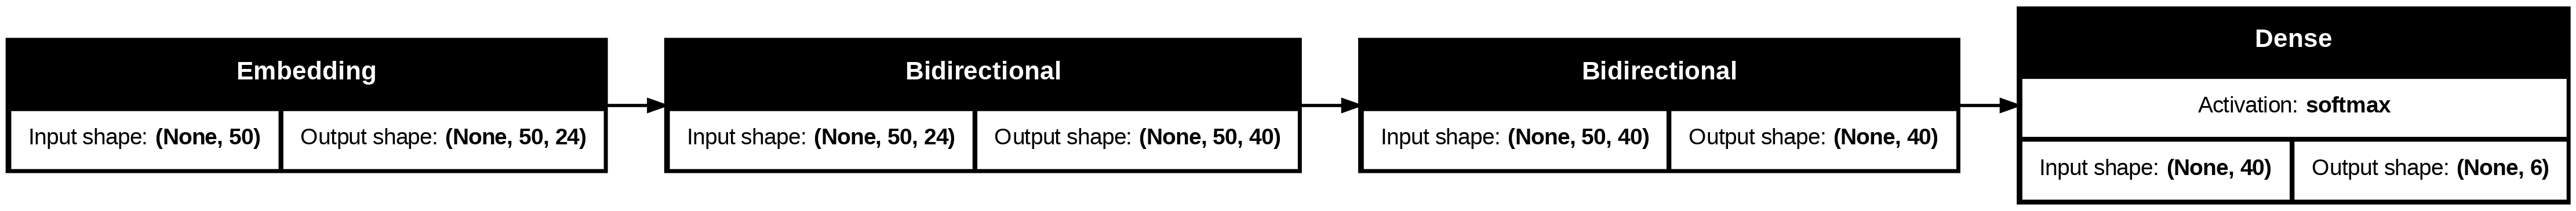

In [ ]:
tf.keras.utils.plot_model(model, rankdir='LR', show_shapes=True, show_layer_activations=True)

## Task 8: Training the Model

1. Preparing a validation set
2. Training the model

This code prepares the validation dataset for model evaluation. First, get_tweet(val) extracts the text of the tweets (val_tweets) and their corresponding emotion labels (val_labels) from the validation split. Then, get_sequences(tokenizer, val_tweets) tokenizes and pads the validation tweets using the same tokenizer and max_len (50) as the training data, producing val_seq, which is ready to be fed into the trained neural network. This ensures the validation data is formatted consistently with the training inputs for accurate performance assessment.

In [ ]:
val_tweets, val_labels = get_tweet(val)
val_seq = get_sequences(tokenizer, val_tweets)

In [ ]:
val_tweets[0], val_labels[0], class_to_index[val_labels[0]]

('im feeling quite sad and sorry for myself but ill snap out of it soon',
 'sadness',
 4)

This section handles label encoding, model training, and monitoring for the Tweet Emotion Recognition system. The emotion labels are converted into one-hot encoded vectors using OneHotEncoder so the neural network can perform multi-class classification. A custom Logger callback is defined to print the training and validation F1 scores at the end of each epoch, providing detailed performance feedback. The model is then trained on the padded training sequences (padded_train_seq) and corresponding one-hot labels, with validation data prepared in the same format. Training uses class weights to address class imbalance and includes callbacks for early stopping (to prevent overfitting) and learning rate reduction (to improve convergence). The model is trained for up to 100 epochs, with the callbacks ensuring that the best-performing weights based on validation F1 score are restored. This setup ensures robust, well-monitored training for accurate emotion recognition across all classes.

In [ ]:
from sklearn.preprocessing import OneHotEncoder

num_classes = len(np.unique(labels))
ohe = OneHotEncoder(sparse_output=False, categories='auto')
labels_cat = ohe.fit_transform(np.reshape(labels, (-1, 1)))
val_labels_cat = ohe.transform(np.reshape(val_labels, (-1, 1)))


class Logger(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        f1_score = logs.get('f1_score')
        val_f1_score = logs.get('val_f1_score')
        print('=' * 30, epoch + 1, '=' * 30)
        print(f'f1_score: {f1_score}')
        print(f'val_f1_score: {val_f1_score}')


h = model.fit(
    x=tf.convert_to_tensor(padded_train_seq),
    y=tf.convert_to_tensor(labels_cat),
    validation_data=(
        tf.convert_to_tensor(val_seq),
        tf.convert_to_tensor(val_labels_cat),
    ),
    verbose=0,
    class_weight=class_weights_ints,
    epochs=100,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(monitor='val_f1_score', patience=5, restore_best_weights=True),
        tf.keras.callbacks.ReduceLROnPlateau(monitor='val_f1_score', factor=0.2, patience=5, min_lr=1e-5,
                                             restore_best_weights=True),
        Logger()
    ]
)

============================== 1 ==============================
f1_score: 0.3290122449398041
val_f1_score: 0.4735140800476074
============================== 2 ==============================
f1_score: 0.6276986598968506
val_f1_score: 0.7516043782234192
============================== 3 ==============================
f1_score: 0.8219799995422363
val_f1_score: 0.8337319493293762
============================== 4 ==============================
f1_score: 0.8959579467773438
val_f1_score: 0.8455049395561218
============================== 5 ==============================
f1_score: 0.9209206700325012
val_f1_score: 0.8510006070137024
============================== 6 ==============================
f1_score: 0.9252602458000183
val_f1_score: 0.844316303730011
============================== 7 ==============================
f1_score: 0.9513551592826843
val_f1_score: 0.8655754923820496
============================== 8 ==============================
f1_score: 0.9609276652336121
val_f1_score: 0.8650658130

## Task 9: Evaluating the Model

1. Visualizing training history
2. Prepraring a test set
3. A look at individual predictions on the test set
4. A look at all predictions on the test set

This code visualizes the model’s training performance over epochs using Matplotlib. It first calculates the number of epochs the model was trained (epochs_trained) from the history object returned by model.fit(). The first subplot plots the F1 score for both training and validation sets, providing insight into how well the model is learning and generalizing across emotion classes. The second subplot shows the loss curves for training and validation, which helps detect issues like overfitting or underfitting. Gridlines and legends make the plots easier to interpret, offering a clear visual summary of the model’s performance throughout the training process.

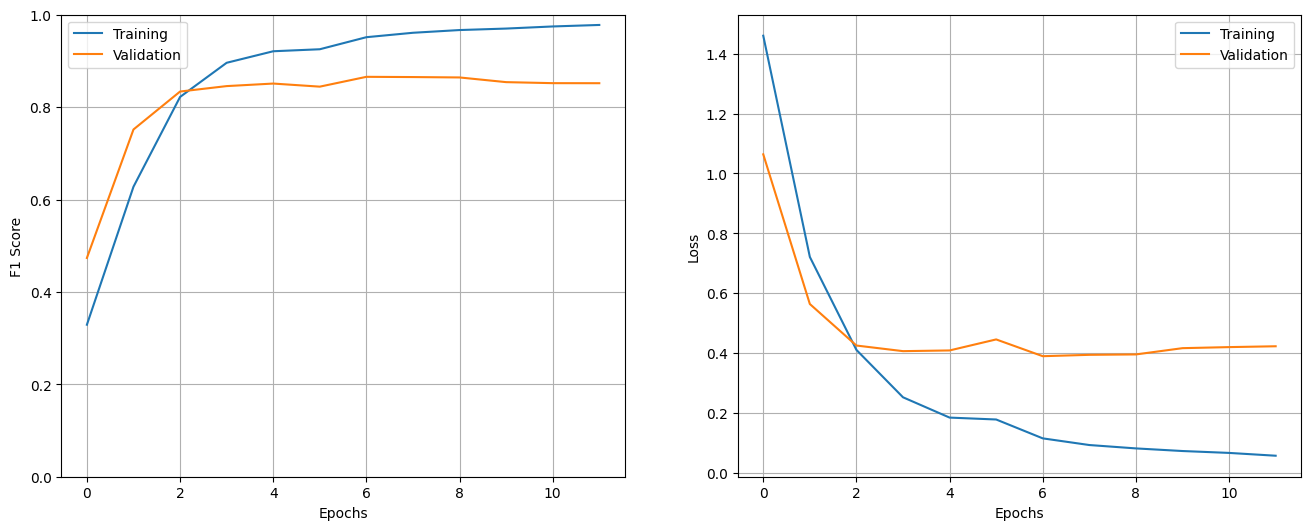

In [ ]:
epochs_trained = len(h.history['loss'])
plt.figure(figsize=(16, 6))

plt.subplot(1, 2, 1)
plt.plot(range(0, epochs_trained), h.history.get('f1_score'), label='Training')
plt.plot(range(0, epochs_trained), h.history.get('val_f1_score'), label='Validation')
plt.ylim([0., 1.])
plt.xlabel('Epochs')
plt.ylabel('F1 Score')
plt.legend()
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(range(0, epochs_trained), h.history.get('loss'), label='Training')
plt.plot(range(0, epochs_trained), h.history.get('val_loss'), label='Validation')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

In [ ]:
test_tweets, test_labels = get_tweet(test)
test_seq = get_sequences(tokenizer, test_tweets)
test_tweets[0], test_labels[0], class_to_index[test_labels[0]], test_seq[0]

('im feeling rather rotten so im not very ambitious right now',
 'sadness',
 4,
 array([  16,    8,  203,  715,   15,   16,   26,   46, 5584,  114,   58,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0], dtype=int32))

In [ ]:
model.evaluate(
    test_seq,
    ohe.transform(np.reshape(test_labels, (-1, 1))),
    verbose=2
)

63/63 - 1s - 12ms/step - f1_score: 0.8436 - loss: 0.3962


[0.3962364196777344, 0.8435717225074768]

In [ ]:
y_pred = model(test_seq)
y_pred

<tf.Tensor: shape=(1986, 6), dtype=float32, numpy=
array([[1.7947407e-03, 1.5488912e-03, 1.3214204e-03, 2.3920566e-05,
        9.9237579e-01, 2.9352731e-03],
       [1.9235670e-03, 1.3621466e-03, 1.4070299e-03, 4.8296712e-05,
        9.9304575e-01, 2.2132627e-03],
       [1.8522417e-03, 8.6692692e-04, 1.8894214e-03, 4.6242578e-05,
        9.9422014e-01, 1.1250195e-03],
       ...,
       [3.2413350e-03, 8.2522187e-05, 9.9524444e-01, 6.6604599e-04,
        7.0633792e-04, 5.9286271e-05],
       [1.9631223e-03, 7.1287948e-05, 9.9647009e-01, 7.2857254e-04,
        7.1456213e-04, 5.2502164e-05],
       [3.4557059e-02, 4.7467262e-02, 8.6082810e-01, 1.5134689e-02,
        1.4487066e-02, 2.7525730e-02]], dtype=float32)>

This code evaluates the trained Tweet Emotion Recognition model on the test dataset. First, the model’s predictions (y_pred) are converted from one-hot encoded outputs to human-readable emotion labels using index_to_class. The true labels are stored in y_true. The classification report from sklearn.metrics then provides a detailed performance summary for each emotion class, including precision, recall, and F1 score, while zero_division=0 ensures no errors for classes with no predictions. Finally, the confusion matrix is visualized using the previously defined show_confusion_matrix function, giving a clear view of which emotions the model predicts correctly and where misclassifications occur. This combined evaluation provides both quantitative metrics and visual insights into the model’s performance on unseen data.

              precision    recall  f1-score   support

       anger       0.83      0.86      0.85       274
        fear       0.88      0.84      0.86       224
         joy       0.94      0.88      0.91       688
        love       0.71      0.92      0.80       156
     sadness       0.95      0.92      0.93       579
    surprise       0.63      0.80      0.70        65

    accuracy                           0.89      1986
   macro avg       0.82      0.87      0.84      1986
weighted avg       0.90      0.89      0.89      1986



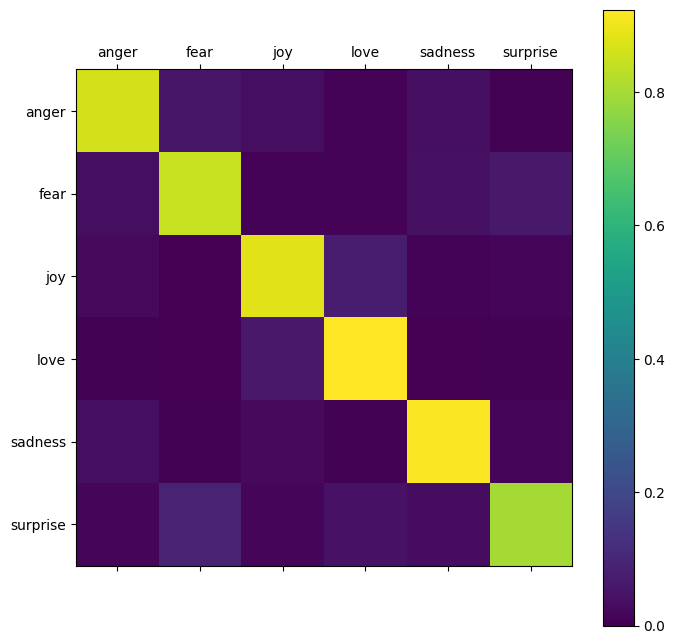

In [ ]:
from sklearn.metrics import classification_report

y_pred_flat = np.array([index_to_class[pred] for pred in np.argmax(y_pred, axis=1)])
y_true = np.array(test_labels)

print(classification_report(y_true, y_pred_flat, zero_division=0))
show_confusion_matrix(y_true, y_pred_flat, classes)

This code saves the trained Tweet Emotion Recognition model for future use or deployment. The first line, model.save('tweet_emotion_recognition_model.keras'), saves the model in Keras’s native .keras format, which preserves the architecture, weights, and optimizer state for easy reloading. The second line, model.export('tweet_emotion_recognition_model_tf'), exports the model in TensorFlow’s SavedModel format, making it compatible with TensorFlow Serving, TensorFlow Lite, or other deployment pipelines. Saving the model in both formats ensures flexibility for retraining, inference, or deployment in different environments.

In [ ]:
model.save('tweet_emotion_recognition_model.keras')
model.export('tweet_emotion_recognition_model_tf')

Saved artifact at 'tweet_emotion_recognition_model_tf'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 50), dtype=tf.float32, name='input_layer')
Output Type:
  TensorSpec(shape=(None, 6), dtype=tf.float32, name=None)
Captures:
  134685555405456: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134685555404496: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134685555403728: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134685555405840: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134685555407184: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134685555406032: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134685555404112: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134685555406992: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134685555407760: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134685555406800: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134685

In conclusion, this project successfully demonstrates a complete workflow for recognizing emotions in tweets using deep learning and natural language processing techniques. By leveraging the mteb/emotion dataset, tweets were preprocessed through tokenization, padding, and handling class imbalance to prepare them for model training. A Bidirectional LSTM-based neural network was designed to capture contextual dependencies in the text, and the model was trained using class-weighted one-hot labels with performance monitored via the F1 score. The training process was visualized, and the model’s predictions were evaluated using both classification metrics and a confusion matrix, showing robust performance across multiple emotion categories. Finally, the trained model was saved in both Keras and TensorFlow formats, ensuring it is ready for deployment or future use. This project highlights the effectiveness of deep learning in text-based emotion recognition and provides a scalable framework for similar NLP tasks in social media analysis, sentiment detection, or customer feedback monitoring.